In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
df = pd.read_csv('Bank_Additional.csv', sep = ';')

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [180]:
#the target variable 'y' is heavily imbalance and this will affect the performance of model
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [206]:
# one method to overcome this is to resample the minority class (y = 'yes) to the same size of majority class(y = 'no')
#resampling the dataset to balance column y

df_majority = df[df['y']=='no']
df_minority = df[df['y']=='yes']

In [207]:
len(df_majority)

36548

In [208]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, replace = True, n_samples = 36548)

(array([ 2753., 10946.,  8542.,  4972.,  4588.,  2445.,  1061.,   835.,
          360.,    46.]),
 array([17. , 25.1, 33.2, 41.3, 49.4, 57.5, 65.6, 73.7, 81.8, 89.9, 98. ]),
 <BarContainer object of 10 artists>)

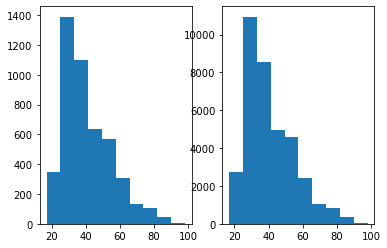

In [209]:
#confirming the original data and the resampled data are having same distribution using 'age' attribute
plt.subplot(1,2,1)
plt.hist(df_minority['age'])
plt.subplot(1,2,2)
plt.hist(df_minority_upsampled['age'])

(array([1.8535e+04, 1.1520e+04, 4.6130e+03, 1.3540e+03, 3.4000e+02,
        9.0000e+01, 3.9000e+01, 3.5000e+01, 1.3000e+01, 9.0000e+00]),
 array([  37. ,  453.2,  869.4, 1285.6, 1701.8, 2118. , 2534.2, 2950.4,
        3366.6, 3782.8, 4199. ]),
 <BarContainer object of 10 artists>)

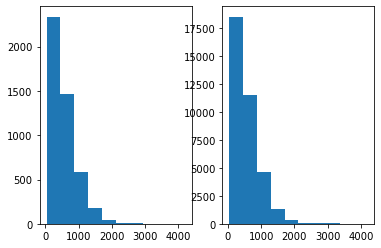

In [10]:
#confirming the original data and the resampled data are having same distribution using 'duration' attribute

plt.subplot(1,2,1)
plt.hist(df_minority['duration'])
plt.subplot(1,2,2)
plt.hist(df_minority_upsampled['duration'])

In [210]:
#creating a new dataset 'dfn' which have a balanced target variabe 'y'
dfn = pd.concat([df_majority, df_minority_upsampled])

In [211]:
dfn.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
39488,80,retired,divorced,basic.4y,no,yes,no,telephone,apr,wed,...,2,999,0,nonexistent,-1.8,93.749,-34.6,0.642,5008.7,yes
16058,38,blue-collar,married,basic.4y,unknown,no,no,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,yes
40358,21,student,single,high.school,no,yes,no,cellular,aug,tue,...,3,9,2,success,-1.7,94.027,-38.3,0.899,4991.6,yes
28177,60,retired,divorced,basic.4y,no,no,no,cellular,apr,tue,...,4,999,0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,yes
20308,32,technician,married,university.degree,unknown,no,no,cellular,aug,mon,...,5,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,yes


In [ ]:
#Exploratory data Analysis
#we will try to analyze the dataset columns wise

In [ ]:
#column wise analysis

In [13]:
dfn.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [20]:
#job
dfn.job.isna().sum()

0

In [22]:
dfn.job.value_counts()
#admin is the most privalent job in the list followed by blue-collared workers and least number is from house maid

admin.           19701
blue-collar      13621
technician       11741
services          6263
management        5225
retired           4621
student           2790
self-employed     2486
entrepreneur      2254
unemployed        2016
housemaid         1804
unknown            574
Name: job, dtype: int64

In [23]:
jobdf = pd.DataFrame()
jobdf['yes'] = dfn[dfn['y']=='yes']['job'].value_counts()
jobdf['no'] = dfn[dfn['y']=='no']['job'].value_counts()
jobdf

,yes,no
admin.,10631,9070
technician,5728,6013
blue-collar,5005,8616
retired,3335,1286
management,2629,2596
services,2617,3646
student,2190,600
self-employed,1214,1272
unemployed,1146,870
entrepreneur,922,1332


<AxesSubplot:>

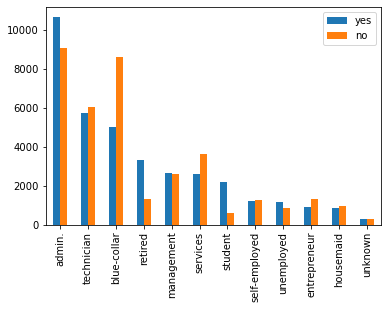

In [24]:
jobdf.plot.bar()

In [133]:
#age of different occupations
dfn[['job','age']].groupby('job').mean().sort_values(by = 'age',ascending = False)
#retired people have the highest average obviously followed by housemaids and management professionals. the youngest
#customers are students

,age
job,
retired,65.872106
housemaid,48.568736
unknown,47.088850
management,42.598852
entrepreneur,41.773736
blue-collar,39.517289
unemployed,39.261905
self-employed,39.154063
technician,38.194447


In [181]:
#success rate of closing a deal among customers with various jobs
job_tit = list(dfn['job'].value_counts().index)
job_per = []
for jo in job_tit:
    percent = ((dfn[dfn['job']== jo]['y'] == 'yes').sum()/dfn.job.value_counts()[jo])*100
    job_per.append(percent)
    


In [182]:
job_tit = pd.Series(job_tit)
job_per = pd.Series(job_per)

pd.concat([job_tit,job_per], axis = 1)

#out of all the professions retired and students are more chances to accept the offer made by the caller and hardest to
#crack would be blue-collar employees, entrepreneurs and services professionals

,0,1
0,admin.,53.961728
1,blue-collar,36.744732
2,technician,48.786304
3,services,41.785087
4,management,50.315789
5,retired,72.170526
6,student,78.494624
7,self-employed,48.833467
8,entrepreneur,40.905058
9,unemployed,56.845238


In [25]:
#marital column
dfn['marital'].value_counts()

#a major pie of the customers are married

married     42296
single      22752
divorced     7890
unknown       158
Name: marital, dtype: int64

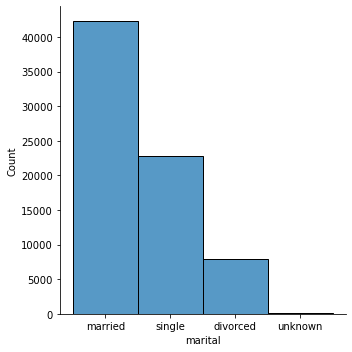

In [26]:
sns.displot(dfn.marital)

In [27]:
df_mar = pd.DataFrame()
df_mar['yes'] = dfn[dfn['y']=='yes']['marital'].value_counts()
df_mar['no'] = dfn[dfn['y']=='no']['marital'].value_counts()
df_mar

,yes,no
married,19900,22396
single,12804,9948
divorced,3754,4136
unknown,90,68


<AxesSubplot:>

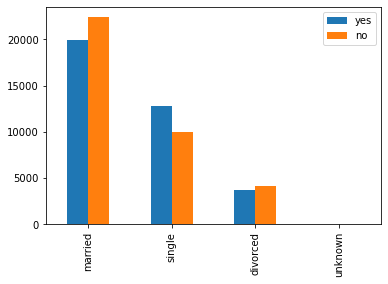

In [28]:
df_mar.plot.bar()

In [165]:
#success rate of deposits among various maritals
mari_tit = list(dfn['marital'].value_counts().index)
mari_per = []
for mari in mari_tit:
    percent = ((dfn[dfn['marital']== mari]['y'] == 'yes').sum()/dfn.marital.value_counts()[mari])*100
    mari_per.append(percent)
    
mari_tit = pd.Series(mari_tit)
mari_per = pd.Series(mari_per)

pd.concat([mari_tit,mari_per], axis = 1)

#singles and people with unknown marital status tend to be more possible to accept the sales campaign thatn married and divorced

,0,1
0,married,47.049366
1,single,56.276371
2,divorced,47.579214
3,unknown,56.962025


In [29]:
#education
dfn['education'].value_counts()
#majority of the bank clienele have a university degree or high school degree. illiterates are in the least number
#among all the education backgrounds

university.degree      23775
high.school            16674
basic.9y                9328
professional.course     9248
basic.4y                7086
basic.6y                3529
unknown                 3415
illiterate                41
Name: education, dtype: int64

In [30]:
df_edu = pd.DataFrame()
df_edu['yes'] = dfn[dfn['y']=='yes']['education'].value_counts()
df_edu['no'] = dfn[dfn['y']=='no']['education'].value_counts()
df_edu

,yes,no
university.degree,13277,10498
high.school,8190,8484
professional.course,4600,4648
basic.9y,3756,5572
basic.4y,3338,3748
unknown,1935,1480
basic.6y,1425,2104
illiterate,27,14


<AxesSubplot:>

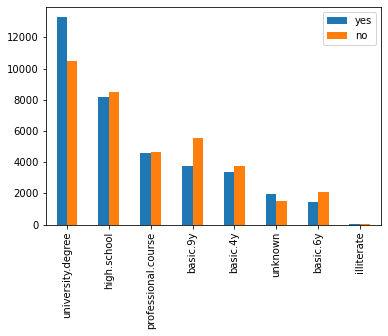

In [31]:
df_edu.plot.bar()

In [167]:
#success rate of deposits among various education
edu_tit = list(dfn['education'].value_counts().index)
edu_per = []
for edu in edu_tit:
    percent = ((dfn[dfn['education']== edu]['y'] == 'yes').sum()/dfn.education.value_counts()[edu])*100
    edu_per.append(percent)
    
edu_tit = pd.Series(edu_tit)
edu_per = pd.Series(edu_per)

pd.concat([edu_tit,edu_per], axis = 1)
    
#illeterate people tend to be more accepting the campaign than anyother educational backgrounds followed by 
#people with unknown and university degree educational backgrounds

,0,1
0,university.degree,55.844374
1,high.school,49.118388
2,basic.9y,40.265866
3,professional.course,49.740484
4,basic.4y,47.106971
5,basic.6y,40.379711
6,unknown,56.661786
7,illiterate,65.853659


In [33]:
#default

dfn.default.value_counts()

no         61386
unknown    11707
yes            3
Name: default, dtype: int64

<ipython-input-34-72bfadbb7d09>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_def['yes'] = dfn[df['y']=='yes']['default'].value_counts()


<AxesSubplot:>

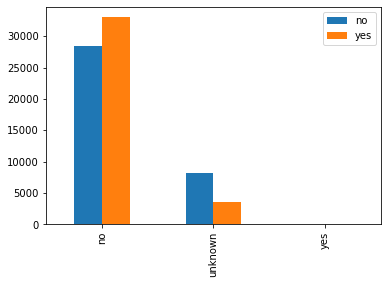

In [34]:
df_def = pd.DataFrame()
df_def['no'] = dfn[dfn['y']=='no']['default'].value_counts()
df_def['yes'] = dfn[df['y']=='yes']['default'].value_counts()

df_def.plot.bar()

In [168]:
#success rate of deposits among various default
def_tit = list(dfn['default'].value_counts().index)
def_per = []
for defi in def_tit:
    percent = ((dfn[dfn['default']== defi]['y'] == 'yes').sum()/dfn.default.value_counts()[defi])*100
    def_per.append(percent)
    
def_tit = pd.Series(def_tit)
def_per = pd.Series(def_per)

pd.concat([def_tit,def_per], axis = 1)
    

#people with no default history have more chances to accept the campaingn and people with any default history will never
#accept the term deposit proposal

,0,1
0,no,53.750041
1,unknown,30.349364
2,yes,0.000000


In [36]:
#housing

dfn.housing.value_counts()

yes        38721
no         32651
unknown     1724
Name: housing, dtype: int64

<AxesSubplot:>

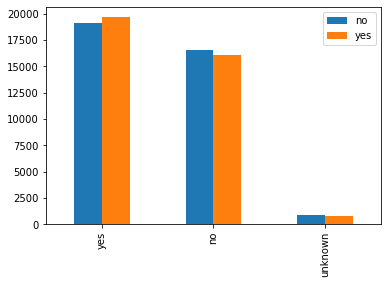

In [37]:
hou_df = pd.DataFrame()
hou_df['no'] = dfn[dfn['y']=='no']['housing'].value_counts()
hou_df['yes'] = dfn[dfn['y']=='yes']['housing'].value_counts()
hou_df.plot.bar()

In [169]:
#success rate of deposits among various housing
hou_tit = list(dfn['housing'].value_counts().index)
hou_per = []
for hou in hou_tit:
    percent = ((dfn[dfn['housing']== hou]['y'] == 'yes').sum()/dfn.housing.value_counts()[hou])*100
    hou_per.append(percent)
    
hou_tit = pd.Series(hou_tit)
hou_per = pd.Series(hou_per)

pd.concat([hou_tit,hou_per], axis = 1)

#success rates are almost the same irrespective whether the customer is having housing loan or not

,0,1
0,yes,50.752821
1,no,49.171541
2,unknown,48.781903


In [38]:
#loan

dfn.loan.value_counts()

no         60414
yes        10958
unknown     1724
Name: loan, dtype: int64

<AxesSubplot:>

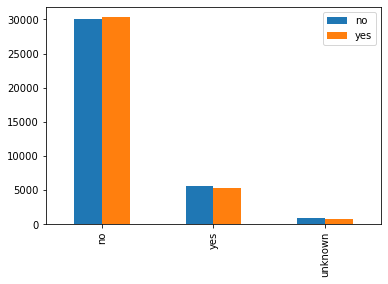

In [39]:
lon_df = pd.DataFrame()
lon_df['no'] = dfn[dfn['y']=='no']['loan'].value_counts()
lon_df['yes'] = dfn[dfn['y']=='yes']['loan'].value_counts()
lon_df.plot.bar()

In [170]:
#success rate of deposits among various loan
lo_tit = list(dfn['loan'].value_counts().index)
lo_per = []
for lo in lo_tit:
    percent = ((dfn[dfn['loan']== lo]['y'] == 'yes').sum()/dfn.loan.value_counts()[lo])*100
    lo_per.append(percent)
    
lo_tit = pd.Series(lo_tit)
lo_per = pd.Series(lo_per)

pd.concat([lo_tit,lo_per], axis = 1)

#success rates are almost the same irrespective whether the customer is having existing loans or not

,0,1
0,no,50.177111
1,yes,49.215185
2,unknown,48.781903


In [40]:
#contacts
dfn.contact.value_counts()

cellular     52557
telephone    20539
Name: contact, dtype: int64

<AxesSubplot:>

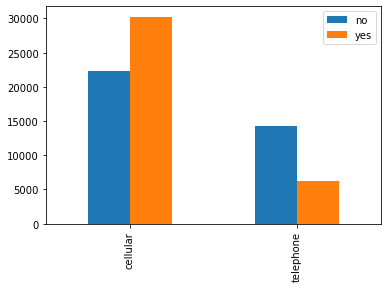

In [41]:
cont_df = pd.DataFrame()
cont_df['no'] = dfn[dfn['y']=='no']['contact'].value_counts()
cont_df['yes'] = dfn[dfn['y']=='yes']['contact'].value_counts()
cont_df.plot.bar()

In [171]:
#success rate of deposits among various contacts
con_tit = list(dfn['contact'].value_counts().index)
con_per = []
for con in con_tit:
    percent = ((dfn[dfn['contact']== con]['y'] == 'yes').sum()/dfn.contact.value_counts()[con])*100
    con_per.append(percent)
    
con_tit = pd.Series(con_tit)
con_per = pd.Series(con_per)

pd.concat([con_tit,con_per], axis = 1)

#cellular contacts have more chances of success way more than tradional telephone contacts

,0,1
0,cellular,57.587001
1,telephone,30.585715


In [42]:
#month


In [43]:
dfn.month.value_counts()

may    19810
jul    11652
aug    10714
jun     9192
nov     6920
apr     6245
oct     2888
mar     2476
sep     2354
dec      845
Name: month, dtype: int64

C:\Users\abyge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

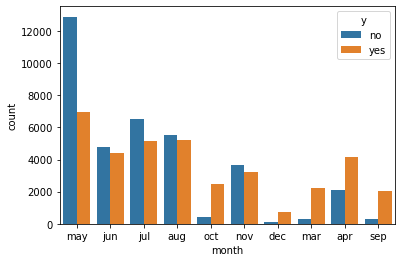

In [44]:
sns.countplot(dfn.month,hue= dfn.y)

In [173]:
#success rate of deposits among various months
mo_tit = list(dfn['month'].value_counts().index)
mo_per = []
for mo in mo_tit:
    percent = ((dfn[dfn['month']== mo]['y'] == 'yes').sum()/dfn.month.value_counts()[mo])*100
    mo_per.append(percent)
    
mo_tit = pd.Series(mo_tit)
mo_per = pd.Series(mo_per)

pd.concat([mo_tit,mo_per], axis = 1)

#campaign is most successful in months october, march, september and december and least possible
#May

,0,1
0,may,34.967188
1,jul,44.001030
2,aug,48.450625
3,jun,48.226719
4,nov,46.748555
5,apr,66.485188
6,oct,86.045706
7,mar,89.095315
8,sep,86.661003
9,dec,88.994083


<AxesSubplot:>

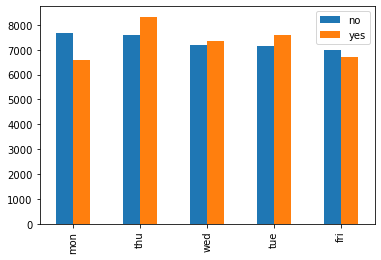

In [152]:
#day of week
dow_df = pd.DataFrame()
dow_df['no'] = dfn[dfn['y']=='no']['day_of_week'].value_counts()
dow_df['yes'] = dfn[dfn['y']=='yes']['day_of_week'].value_counts()
dow_df.plot.bar()

In [174]:
#success rate of deposits among various day of week
day_tit = list(dfn['day_of_week'].value_counts().index)
day_per = []
for day in day_tit:
    percent = ((dfn[dfn['day_of_week']== day]['y'] == 'yes').sum()/dfn.day_of_week.value_counts()[day])*100
    day_per.append(percent)
    
day_tit = pd.Series(day_tit)
day_per = pd.Series(day_per)

pd.concat([day_tit,day_per], axis = 1)

#there are almost equal chance of converting a customer on all days of a week

,0,1
0,thu,51.876548
1,tue,51.296574
2,wed,50.851631
3,mon,46.760642
4,fri,48.950640


In [45]:
#poutcome
dfn.poutcome.value_counts()

nonexistent    57022
failure         8432
success         7642
Name: poutcome, dtype: int64

C:\Users\abyge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='poutcome', ylabel='count'>

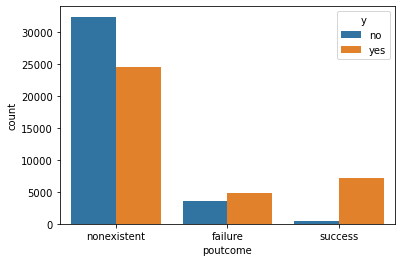

In [46]:
sns.countplot(dfn.poutcome, hue= dfn.y)

In [175]:
#success rate of deposits among various poutcome
po_tit = list(dfn['poutcome'].value_counts().index)
po_per = []
for po in po_tit:
    percent = ((dfn[dfn['poutcome']== po]['y'] == 'yes').sum()/dfn.poutcome.value_counts()[po])*100
    po_per.append(percent)
    
po_tit = pd.Series(po_tit)
po_per = pd.Series(po_per)

pd.concat([po_tit,po_per], axis = 1)
    
#93 percent of the people who accepted the previous campaign accepted the proposal for term deposit too

,0,1
0,nonexistent,43.141244
1,failure,56.748102
2,success,93.732007


In [47]:
#numerical values

In [183]:
dfn.age.describe()


count    73096.000000
mean        40.405946
std         12.007767
min         17.000000
25%         31.000000
50%         38.000000
75%         48.000000
max         98.000000
Name: age, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1f239fa67c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f239fa6e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f239fa6460>],
 'medians': [<matplotlib.lines.Line2D at 0x1f239fb0580>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f239fb08e0>],
 'means': []}

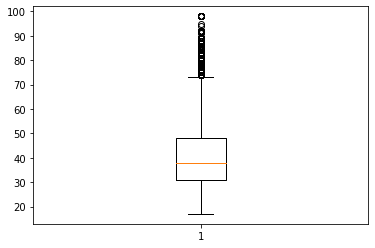

In [184]:
plt.boxplot(dfn.age)

C:\Users\abyge\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

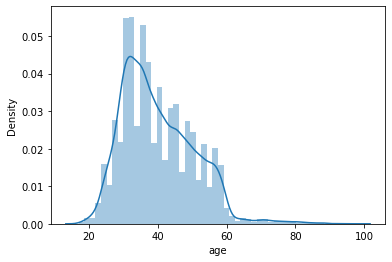

In [185]:
sns.distplot(df.age)

In [186]:
print(max(dfn.age),'\n',min(dfn.age))


98 
 17


In [187]:
dfn.age.isna().sum()

0

In [54]:
#campaign column
dfn.campaign.value_counts()

1     33581
2     18764
3      9306
4      4321
5      2433
6      1509
7       899
8       530
9       395
10      304
11      259
12      149
13      121
17       82
14       73
15       66
16       51
18       33
20       30
19       26
21       24
23       23
22       17
24       15
27       11
29       10
25        8
26        8
28        8
31        7
30        7
35        5
32        4
33        4
34        3
40        2
42        2
43        2
39        1
41        1
37        1
56        1
Name: campaign, dtype: int64

C:\Users\abyge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='campaign', ylabel='count'>

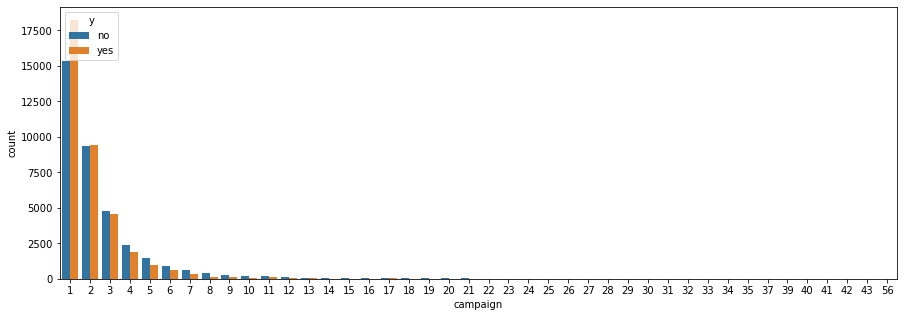

In [57]:
plt.figure(figsize = (15,5))
sns.countplot(dfn.campaign,hue = dfn.y)
#most of the customer are called over a few times only. The majority was ony called only one time only while
#more than 50% of these cases where converted to deposits. It is very less to call customers more than
#5 times for sales and interestingly more calls means less chance of converting

In [58]:
#pdays number of days passed after last contact
dfn.pdays.value_counts()

999    64822
3       2532
6       2397
4        584
7        351
2        316
9        310
10       260
13       239
12       228
5        224
15       132
11       122
14       122
8        100
0         90
1         86
16        52
18        35
17        23
22        21
21        16
26        13
19         9
27         7
25         4
20         1
Name: pdays, dtype: int64

In [198]:
per_new_con

0.8868063915946153

In [200]:
dfpdays = dfn[dfn['pdays']!=999]
ex_cust = len(dfpdays)
first_cust = len(dfn[dfn['pdays']==999])
per_new_con = first_cust/(ex_cust+first_cust)
print('People contacted earlier = {}'.format(ex_cust))
print('People contacted for the first time = {}'.format(first_cust))
print('Percentage of Cusomters contacting first time = {}'.format(per_new_con))
#new customers are the majority among people contacted for this campaign
#about 89 percentage of all customers was never contacted before

People contacted earlier = 8274
People contacted for the first time = 64822
Percentage of Cusomters contacting first time = 0.8868063915946153


C:\Users\abyge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pdays', ylabel='count'>

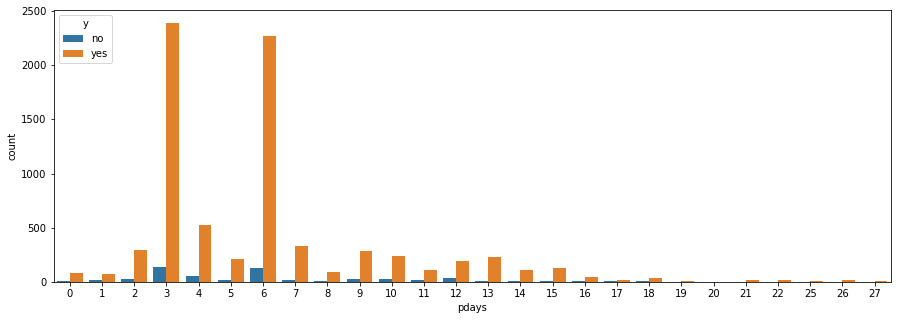

In [64]:
plt.figure(figsize = (15,5))
sns.countplot(dfpdays.pdays,hue= dfpdays.y)

In [67]:
dfpday_out = dfn[dfn['pdays']==999]

In [69]:
dfpday_out[['pdays','y']].groupby('y').count()

,pdays
y,
no,36000
yes,28822


In [74]:
len(dfn[dfn['campaign']==1])

33581

In [75]:
dfn.campaign.value_counts()

1     33581
2     18764
3      9306
4      4321
5      2433
6      1509
7       899
8       530
9       395
10      304
11      259
12      149
13      121
17       82
14       73
15       66
16       51
18       33
20       30
19       26
21       24
23       23
22       17
24       15
27       11
29       10
25        8
26        8
28        8
31        7
30        7
35        5
32        4
33        4
34        3
40        2
42        2
43        2
39        1
41        1
37        1
56        1
Name: campaign, dtype: int64

In [77]:
#previous
dfn.previous.value_counts()

0    57022
1    11331
2     3208
3     1095
4      310
5      104
6       25
7        1
Name: previous, dtype: int64

C:\Users\abyge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abyge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Contacts on previous campaign'}, xlabel='previous', ylabel='count'>

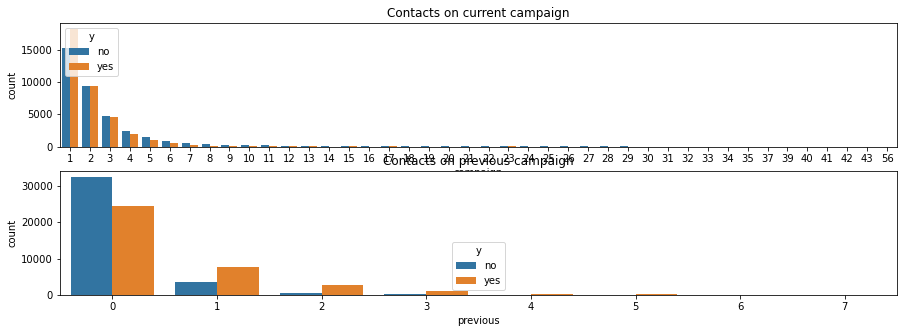

In [88]:
plt.figure(figsize = (15,5))
plt.subplot(2,1,1)
plt.title('Contacts on current campaign')
sns.countplot(dfn.campaign,hue = dfn.y)
plt.subplot(2,1,2)
plt.title('Contacts on previous campaign')
sns.countplot(dfn.previous,hue=  dfn.y)


C:\Users\abyge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abyge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Contacts on previous campaign'}, xlabel='previous', ylabel='count'>

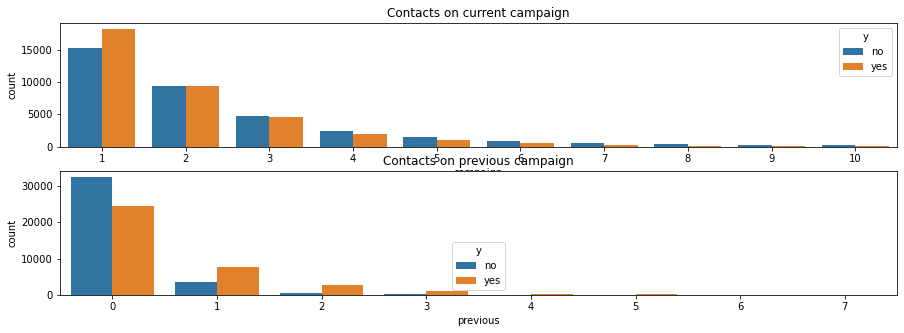

In [91]:
plt.figure(figsize = (15,5))
plt.subplot(2,1,1)
plt.title('Contacts on current campaign')
sns.countplot(dfn[dfn['campaign']<=10]['campaign'],hue = dfn[dfn['campaign']<=10]['y'])
plt.subplot(2,1,2)
plt.title('Contacts on previous campaign')
sns.countplot(dfn.previous,hue=  dfn.y)


In [95]:
#emp.var.rate
dfn['emp.var.rate'].value_counts()

 1.4    22190
-1.8    19118
 1.1     9413
-2.9     5799
-0.1     5236
-3.4     4186
-1.7     3569
-1.1     2740
-3.0      827
-0.2       18
Name: emp.var.rate, dtype: int64

C:\Users\abyge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emp.var.rate', ylabel='count'>

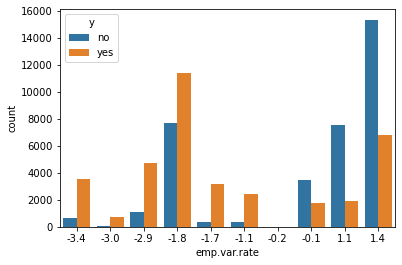

In [96]:
sns.countplot(dfn['emp.var.rate'], hue = dfn.y)

In [98]:
#cons.price.idx
dfn['cons.price.idx'].value_counts()

93.918    9530
93.994    9413
92.893    9357
93.444    7003
94.465    5657
93.075    5377
93.200    4886
92.201    2653
92.963    2532
92.431    1664
92.649    1517
94.215    1508
94.199    1349
93.369    1318
92.843    1158
94.027    1058
93.876    1040
92.379    1005
94.055    1003
94.601     874
93.749     868
92.713     827
92.469     614
94.767     517
93.798     350
92.756      18
Name: cons.price.idx, dtype: int64

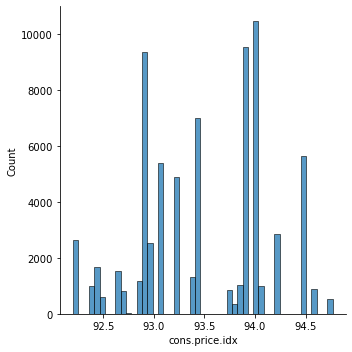

In [99]:
sns.displot(dfn['cons.price.idx'])

C:\Users\abyge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cons.price.idx', ylabel='count'>

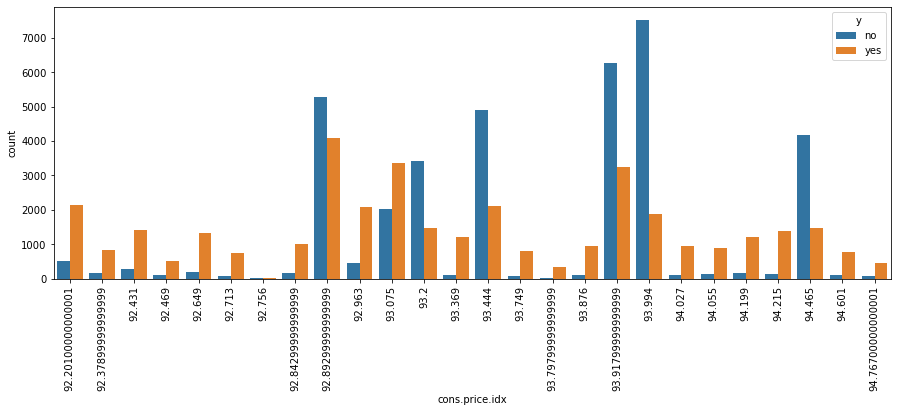

In [101]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
sns.countplot(dfn['cons.price.idx'],hue = dfn.y)

In [108]:
#cons.conf.idx
dfn['cons.conf.idx'].value_counts()

-42.7    9530
-36.4    9413
-46.2    9357
-36.1    7003
-41.8    5657
-47.1    5377
-42.0    4886
-31.4    2653
-40.8    2532
-26.9    1664
-30.1    1517
-40.3    1508
-37.5    1349
-34.8    1318
-50.0    1158
-38.3    1058
-40.0    1040
-29.8    1005
-39.8    1003
-49.5     874
-34.6     868
-33.0     827
-33.6     614
-50.8     517
-40.4     350
-45.9      18
Name: cons.conf.idx, dtype: int64

C:\Users\abyge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cons.conf.idx', ylabel='count'>

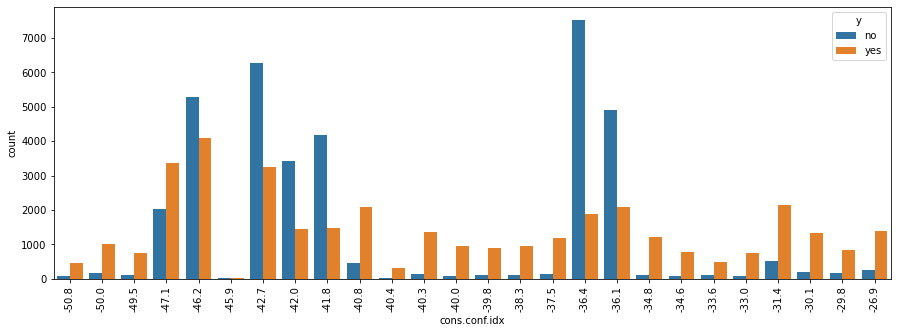

In [110]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
sns.countplot(dfn['cons.conf.idx'],hue = dfn.y)

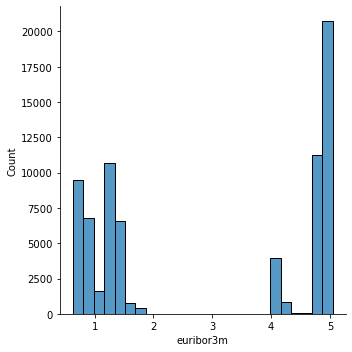

In [114]:
#euribor3m
sns.displot(dfn.euribor3m)

In [117]:
dfn['nr.employed'].value_counts()

5228.1    22190
5099.1    15892
5191.0     9413
5076.2     5799
5195.8     5236
5017.5     4186
4991.6     3569
5008.7     3226
4963.6     2740
5023.5      827
5176.3       18
Name: nr.employed, dtype: int64

C:\Users\abyge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nr.employed', ylabel='count'>

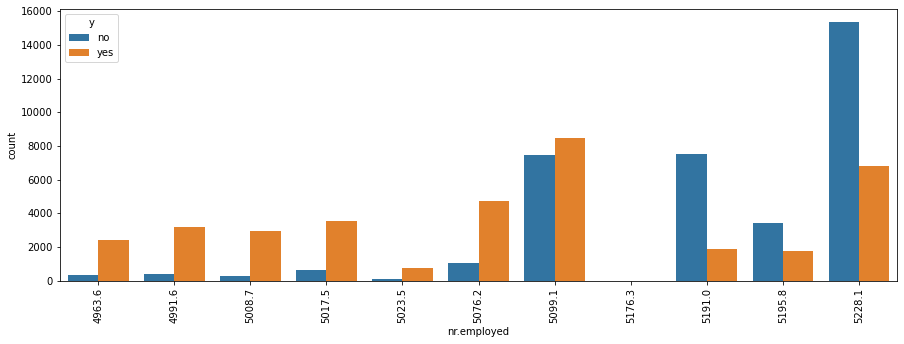

In [119]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
sns.countplot(dfn['nr.employed'], hue = dfn.y)

In [120]:
dfn.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
emp.var.rate       0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
nr.employed        0
y                  0
age_buck          16
camp_buck          1
dtype: int64

In [121]:
dfn.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,73096.000000,73096.000000,73096.000000,73096.000000,73096.000000,73096.000000,73096.000000,73096.000000,73096.000000,73096.000000
mean,40.405946,384.941652,2.341455,886.591865,0.313957,-0.494297,93.479490,-40.169002,2.964177,5135.378479
std,12.007767,356.984839,2.366821,314.635498,0.695150,1.723998,0.634219,5.353745,1.891949,87.151318
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,144.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-42.700000,1.244000,5076.200000
50%,38.000000,265.000000,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,4.021000,5191.000000
75%,48.000000,523.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [123]:
dfn.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.010568,-0.006118,-0.058685,0.060071,-0.049571,-0.020349,0.142359,-0.045467,-0.074449
duration,-0.010568,1.000000,-0.021222,0.031586,-0.041527,0.067538,0.054513,-0.054678,0.054001,0.056160
campaign,-0.006118,-0.021222,1.000000,0.092418,-0.104106,0.198776,0.136112,-0.032191,0.187537,0.189325
pdays,-0.058685,0.031586,0.092418,1.000000,-0.706547,0.337069,0.039086,-0.155042,0.389319,0.473516
previous,0.060071,-0.041527,-0.104106,-0.706547,1.000000,-0.388294,-0.063109,0.078000,-0.453663,-0.527335
emp.var.rate,-0.049571,0.067538,0.198776,0.337069,-0.388294,1.000000,0.720173,-0.069364,0.958551,0.868529
cons.price.idx,-0.020349,0.054513,0.136112,0.039086,-0.063109,0.720173,1.000000,-0.165976,0.570789,0.349200
cons.conf.idx,0.142359,-0.054678,-0.032191,-0.155042,0.078000,-0.069364,-0.165976,1.000000,0.037405,-0.092166
euribor3m,-0.045467,0.054001,0.187537,0.389319,-0.453663,0.958551,0.570789,0.037405,1.000000,0.941135
nr.employed,-0.074449,0.056160,0.189325,0.473516,-0.527335,0.868529,0.349200,-0.092166,0.941135,1.000000


In [125]:
#categorical variables
dfn_cat = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']


In [128]:
#numerical variables
dfn_num = ['age','duration','campaign','pdays','previous','emp.var.rate',
           'cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

In [212]:
dfn.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

<AxesSubplot:xlabel='default', ylabel='duration'>

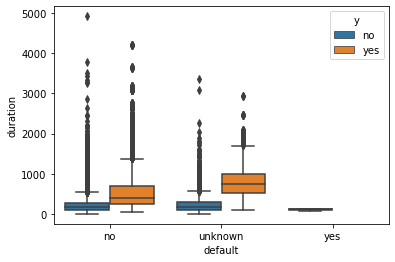

In [130]:
sns.boxplot(x = 'default', y = 'duration',hue = 'y', data = dfn)

In [223]:
dfn.reset_index(drop=True, inplace =True)

In [225]:
dfn.y = pd.to_numeric(dfn.y)
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73096 entries, 0 to 73095
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             73096 non-null  int64  
 1   job             73096 non-null  object 
 2   marital         73096 non-null  object 
 3   education       73096 non-null  object 
 4   default         73096 non-null  object 
 5   housing         73096 non-null  object 
 6   loan            73096 non-null  object 
 7   contact         73096 non-null  object 
 8   month           73096 non-null  object 
 9   day_of_week     73096 non-null  object 
 10  duration        73096 non-null  int64  
 11  campaign        73096 non-null  int64  
 12  pdays           73096 non-null  int64  
 13  previous        73096 non-null  int64  
 14  poutcome        73096 non-null  object 
 15  emp.var.rate    73096 non-null  float64
 16  cons.price.idx  73096 non-null  float64
 17  cons.conf.idx   73096 non-null 

<AxesSubplot:>

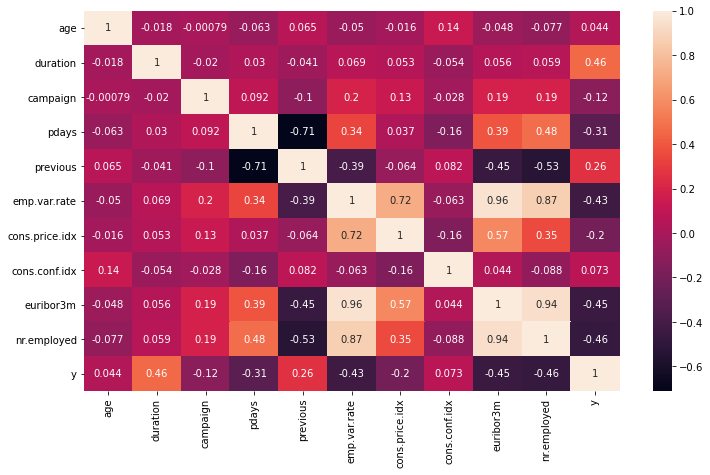

In [226]:
plt.figure(figsize = (12,7))
co = dfn.corr()
sns.heatmap(co,annot = True)

In [230]:
#label encoding of categorical varialbes
cat_vars = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for var in cat_vars:
    dfn[var] = le.fit_transform(dfn[var])

In [231]:
dfn.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [232]:
#splittng the dataset into test and train
x = dfn.iloc[:,:-1]
y = dfn.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [233]:
#Logistic regression classifier
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

C:\Users\abyge\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [234]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm_lm = confusion_matrix(y_test,y_pred)
accu_lm = accuracy_score(y_test,y_pred)
print(cm_lm)
print(accu_lm)

[[9262 1648]
 [1520 9499]]
0.8555337680696794


In [ ]:
#the model is currently giving an accuracy of 85 percentage. Now let us use the decison tree classifier
# to get the relative importance of each feature and further do the feature engineering

In [235]:
from sklearn.tree import DecisionTreeClassifier
dfn_dtc = DecisionTreeClassifier(class_weight = 'balanced')
dfn_dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

In [236]:
y_pred_dtc = dfn_dtc.predict(x_test)

In [237]:
print(confusion_matrix(y_test,y_pred_dtc))
print(accuracy_score(y_test,y_pred_dtc))

[[10169   741]
 [   29 10990]]
0.9648866797391582


In [238]:
importances = dfn_dtc.feature_importances_

In [240]:
dfn_var = (dfn.iloc[:,:-1]).columns
print(dfn_var)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [241]:
indices = np.argsort(importances)[::-1]
print(indices)

[10 19 18 17  0  3  1  9 11  8  2 16 12  5 13  6  4 14 15  7]


In [242]:
for i in range(x_train.shape[1]):
    print('%d feature %s importances is %f' %(i+1,dfn_var[indices][i],importances[indices][i]))

1 feature duration importances is 0.416326
2 feature nr.employed importances is 0.158430
3 feature euribor3m importances is 0.098913
4 feature cons.conf.idx importances is 0.073284
5 feature age importances is 0.057559
6 feature education importances is 0.029398
7 feature job importances is 0.025689
8 feature day_of_week importances is 0.025195
9 feature campaign importances is 0.023435
10 feature month importances is 0.016841
11 feature marital importances is 0.011999
12 feature cons.price.idx importances is 0.010811
13 feature pdays importances is 0.010660
14 feature housing importances is 0.007662
15 feature previous importances is 0.007352
16 feature loan importances is 0.007168
17 feature default importances is 0.006577
18 feature poutcome importances is 0.004946
19 feature emp.var.rate importances is 0.004006
20 feature contact importances is 0.003751


In [ ]:
#from the above analysis the relative importance of various features are obtained where duration is the most important feature 
# while contact is observed to be the least important feature

In [ ]:
#these are the initial results and further model development using feature engineering will be based on the above results